# Lab 3 J005

## Spatial Aggregation

**Q1**

In [4]:
import pandas as pd

df = pd.read_csv('Data.csv')


# Convert PM2.5 values to numeric, forcing errors to NaN
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

# Remove missing values
df = df.dropna(subset=['PM2.5'])

# Group by State and calculate the average PM2.5 for each state
state_avg_pm25 = df.groupby('state')['PM2.5'].mean()

# Identify the state with the highest average PM2.5 concentration
highest_state = state_avg_pm25.idxmax()
highest_value = state_avg_pm25.max()

print(f"State with highest average PM2.5: {highest_state} ({highest_value:.2f})")


State with highest average PM2.5: Delhi (104.10)


**Q2**

In [7]:
import pandas as pd
df = pd.read_csv('Data.csv')


# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract the year and filter data for 2023 (Create a copy to avoid warnings)
df_2023 = df[df['Timestamp'].dt.year == 2023].copy()

# Convert PM2.5 values to numeric, handling errors
df_2023['PM2.5'] = pd.to_numeric(df_2023['PM2.5'], errors='coerce')

# Filter rows where PM2.5 > 300 (Hazardous Level) (Create a copy to avoid warnings)
hazardous_days = df_2023[df_2023['PM2.5'] > 300].copy()

# Extract only the date from the timestamp
hazardous_days['date'] = hazardous_days['Timestamp'].dt.date  

# Count the number of hazardous days per state (unique days)
hazardous_days_count = hazardous_days.groupby(['state', 'date']).size().reset_index(name='Count')

# Find the state with the most hazardous days
most_hazardous_state = hazardous_days_count.groupby('state').size().idxmax()
most_hazardous_days = hazardous_days_count.groupby('state').size().max()

print(f"State with the most hazardous PM2.5 days in 2023: {most_hazardous_state} ({most_hazardous_days} days)")

State with the most hazardous PM2.5 days in 2023: Delhi (49 days)


**Q3**

In [63]:
import pandas as pd
df = pd.read_csv('Data.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filter for the year 2023
df_2023 = df[df['Timestamp'].dt.year == 2023].copy()

# Error Handling
df_2023['PM2.5'] = pd.to_numeric(df_2023['PM2.5'], errors='coerce')

# Group by state and calculate standard deviation of PM2.5 (We used standard deviation as our variability factor)
variability = df_2023.groupby('state')['PM2.5'].std()

# Find the state with the highest variability
most_variable_state = variability.idxmax()
highest_variability = variability.max()

print(f"State with the highest variability in PM2.5 levels in 2023: {most_variable_state} (Std Dev: {highest_variability:.2f})")


State with the highest variability in PM2.5 levels in 2023: Delhi (Std Dev: 82.80)


**Q4**

In [13]:
import pandas as pd
df = pd.read_csv('Data.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filter for the years 2020 and 2021
df_covid = df[df['Timestamp'].dt.year.isin([2020, 2021])].copy()

# Error Handling
df_covid['PM2.5'] = pd.to_numeric(df_covid['PM2.5'], errors='coerce')

# Group by state and calculate the average PM2.5 levels
avg_pm25 = df_covid.groupby('state')['PM2.5'].mean()

# Find the state with the lowest average PM2.5 level
lowest_pm25_state = avg_pm25.idxmin()
lowest_pm25_value = avg_pm25.min()

print(f"State with the lowest average PM2.5 levels during Covid (2020-2021): {lowest_pm25_state} ({lowest_pm25_value:.2f} µg/m³)")

State with the lowest average PM2.5 levels during Covid (2020-2021): Mizoram (14.32 µg/m³)


## Temporal Aggregation

**Q1**

In [15]:
import pandas as pd
df = pd.read_csv('Data.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filter for August 2020
df_aug2020 = df[(df['Timestamp'].dt.year == 2020) & (df['Timestamp'].dt.month == 8)].copy()

# Numeric Error Handling
df_aug2020['PM2.5'] = pd.to_numeric(df_aug2020['PM2.5'], errors='coerce')

# Find the station with the highest PM2.5 value
max_pm25_row = df_aug2020.loc[df_aug2020['PM2.5'].idxmax(), ['station', 'PM2.5']]

print(f"Station with the highest PM2.5 in August 2020: {max_pm25_row['station']} ({max_pm25_row['PM2.5']} µg/m³)")


Station with the highest PM2.5 in August 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (805.51 µg/m³)


**Q2**

month
3   NaN
4   NaN
5   NaN
Name: PM2.5, dtype: float64
month
6          NaN
7    35.518825
8    20.208021
9          NaN
Name: PM2.5, dtype: float64
month
1           NaN
2           NaN
12    67.492344
Name: PM2.5, dtype: float64
The average concentration of PM2.5 in KSPCB station is:

summer: nan

monsoon: 27.86

winter: 67.49



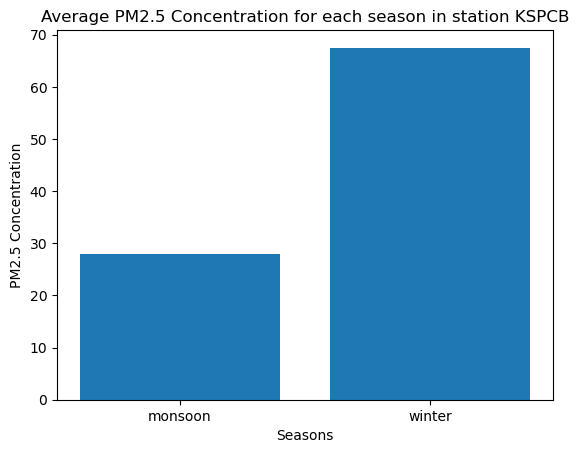

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv")

# Filter for specific city and station
df_1 = df[df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"].copy()

# Extract month and group data
masks=df_1["Timestamp"].str.contains("2018")
df_2=df_1[masks].copy()
df_2["month"] = pd.to_datetime(df_2["Timestamp"]).dt.month
df_monthly_avg = df_2.groupby("month")["PM2.5"].mean()

print(df_monthly_avg.loc[[3, 4, 5]])
print(df_monthly_avg.loc[[6, 7, 8, 9]])
print(df_monthly_avg.loc[[1, 2, 12]])
# Seasonal averages
summer = df_monthly_avg.loc[[3, 4, 5]].mean()
monsoon = df_monthly_avg.loc[[6, 7, 8, 9]].mean()
winter = df_monthly_avg.loc[[1, 2, 12]].mean()

# Plotting of seasons
seasons = ["summer", "monsoon", "winter"]
values = [summer, monsoon, winter]

# Printing all seasons' values
print("The average concentration of PM2.5 in KSPCB station is:\n")
for season, value in zip(seasons, values):
    print(f"{season}: {value:.2f}\n")

# Plot
plt.bar(seasons, values)
plt.xlabel("Seasons")
plt.ylabel("PM2.5 Concentration")
plt.title("Average PM2.5 Concentration for each season in station KSPCB")
plt.show()


# As seen the graph is quite inconsistent with large NaN values. As summer has NaN values, we cannot directy assume which season had the highest pollution.
# Even for monsoon season, the data has two values but for winter only december has a value. This affects the mean of each season. 
# In addition we also cannot impute this data as the sample size is small (only one station) and each season might have outlier values and may not be consistent.

In [21]:
# [Thoughtful Question] Certain seasons get more polluted due to various factors. 
# For ex, winter gets more polluted due to crop burning after kharif and also due to stagnant air which accumulates the pollutants.

**Q3**

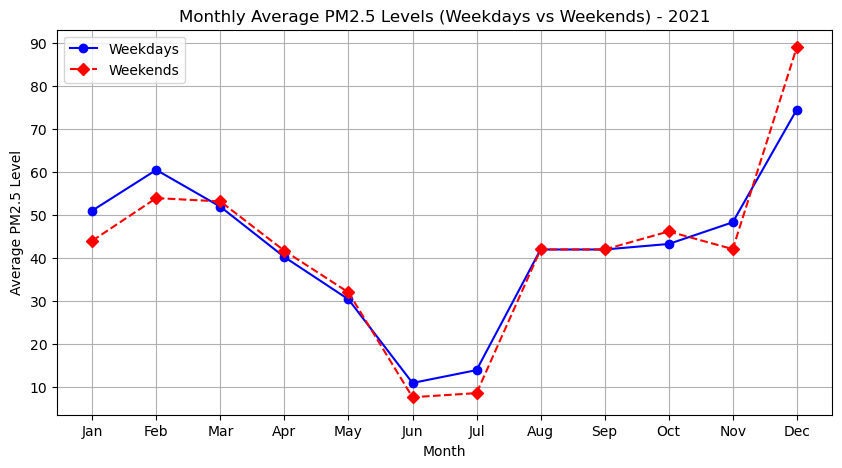

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Data.csv")

# Filter data for the specified station
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_station = df[df["station"] == station_name].copy()

df_station["Timestamp"] = pd.to_datetime(df_station["Timestamp"], errors="coerce")

# Filling missing PM2.5 values with the median. {This is to ensure graph is consistent}
df_station.fillna(df["PM2.5"].median(), inplace=True)

df_station["Year"] = df_station["Timestamp"].dt.year.copy()

# Filter for the year 2021
df_2021 = df_station[df_station["Year"] == 2021].copy()

# Extract month and weekday information
df_2021["Month"] = df_2021["Timestamp"].dt.month.copy()
df_2021["Weekday"] = df_2021["Timestamp"].dt.weekday.copy()

# Categorize as weekday (0-4) or weekend (5-6)
df_2021["Is_Weekend"] = df_2021["Weekday"] >= 5

# Compute monthly average PM2.5 levels for weekdays and weekends
monthly_avg = df_2021.groupby(["Month", "Is_Weekend"])["PM2.5"].mean().unstack()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg[False], marker='o', linestyle='-', label="Weekdays", color='b')
plt.plot(monthly_avg.index, monthly_avg[True], marker='D', linestyle='--', label="Weekends", color='r')

# Labels and title
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Level")
plt.title("Monthly Average PM2.5 Levels (Weekdays vs Weekends) - 2021")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()

# Note: We also have NaN values here but we can still impute as there is a good enough sample space with consistent data to predict the graph's movements.


In [5]:
# This shows that during festivals (October - Diwali and December- New Year and Christmas) the weekends have more pollution levels due to more traffic.
# Whereas on weekdays, the pollution is more in regular months indicating less traffic on weekends.
# This can be interpreted as people preferring to stay at home on weekends than commuting or outstation travels that reduce the levels of their local station.

## Spatio-Temporal Aggregation

**Q1**

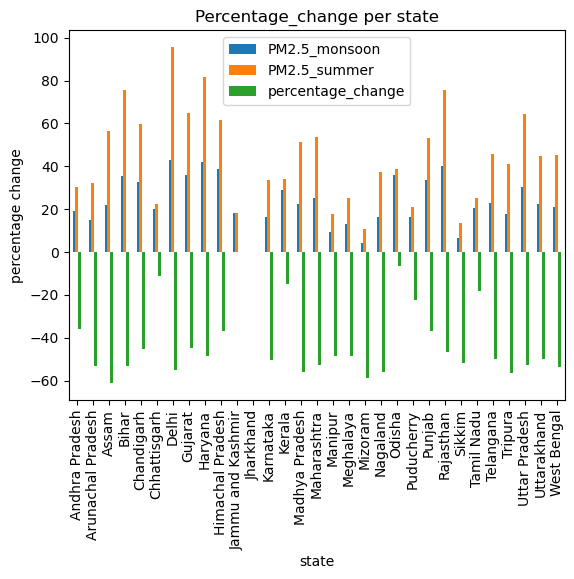

State with the most significant difference in PM2.5 levels: Assam, Percentage Change: -61.18%


In [51]:
import pandas as pd
import numpy as np

df = pd.read_csv('Data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filter for the year 2022
df_2022 = df[df['Timestamp'].dt.year == 2022].copy()
df_2022['PM2.5'] = pd.to_numeric(df_2022['PM2.5'], errors='coerce')

df_2022['Month'] = df_2022['Timestamp'].dt.month

# Filter for monsoon months (June to September) and summer months (March to May)
monsoon_months = [6, 7, 8, 9]
summer_months = [3, 4, 5]

df_monsoon = df_2022[df_2022['Month'].isin(monsoon_months)]
df_summer = df_2022[df_2022['Month'].isin(summer_months)]

# Group by 'state' and calculate the average PM2.5 for both monsoon and summer months
monsoon_avg_pm25 = df_monsoon.groupby('state')['PM2.5'].mean()
summer_avg_pm25 = df_summer.groupby('state')['PM2.5'].mean()

# Merge the two dataframes on 'state'
avg_pm25 = pd.merge(monsoon_avg_pm25, summer_avg_pm25, on='state', suffixes=('_monsoon', '_summer'))

# Calculate the percentage change in PM2.5 levels and plotting it
avg_pm25['percentage_change'] = ((avg_pm25['PM2.5_monsoon'] - avg_pm25['PM2.5_summer']) / avg_pm25['PM2.5_summer']) * 100
avg_pm25.plot(kind="bar")
plt.title("Percentage_change per state")
plt.xlabel('state')
plt.ylabel("percentage change")
plt.show()

# Identify the state with the maximum difference
max_diff_state = avg_pm25['percentage_change'].abs().idxmax()
max_diff_value = avg_pm25.loc[max_diff_state, 'percentage_change']

print(f"State with the most significant difference in PM2.5 levels: {max_diff_state}, Percentage Change: {max_diff_value:.2f}%")

**Q2**

<Figure size 1000x600 with 0 Axes>

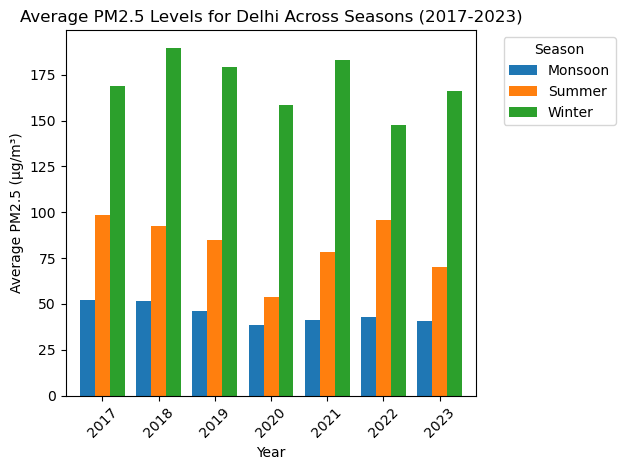

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df_delhi = df[df['city'] == 'Delhi']

# Filter data for the years 2017-2023
df_delhi = df_delhi[df_delhi['Timestamp'].dt.year.between(2017, 2023)]

# Define the seasons (Winter, Summer, Monsoon)
def get_season(month):
    if month in [12, 1, 2]:  # Winter: December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # Summer: March, April, May
        return 'Summer'
    elif month in [6, 7, 8, 9]:  # Monsoon: June, July, August, September
        return 'Monsoon'
    else:
        return None  # In case we have invalid data 
        
df_delhi['Season'] = df_delhi['Timestamp'].dt.month.apply(get_season)

# Group by year and season, and calculate the average PM2.5 for each group
df_delhi['PM2.5'] = pd.to_numeric(df_delhi['PM2.5'], errors='coerce')  # Ensure PM2.5 is numeric
season_avg_pm25 = df_delhi.groupby([df_delhi['Timestamp'].dt.year, 'Season'])['PM2.5'].mean().unstack()

# Plot the data
plt.figure(figsize=(10, 6))
season_avg_pm25.plot(kind='bar', width=0.8)
plt.title('Average PM2.5 Levels for Delhi Across Seasons (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [57]:
# According to the bar graph, the pollution levels are highest in Winter and lowest in monsoon in Delhi across a span of 6 years.
# This means the data is consistent and hence is trustworthy.

**Q3**

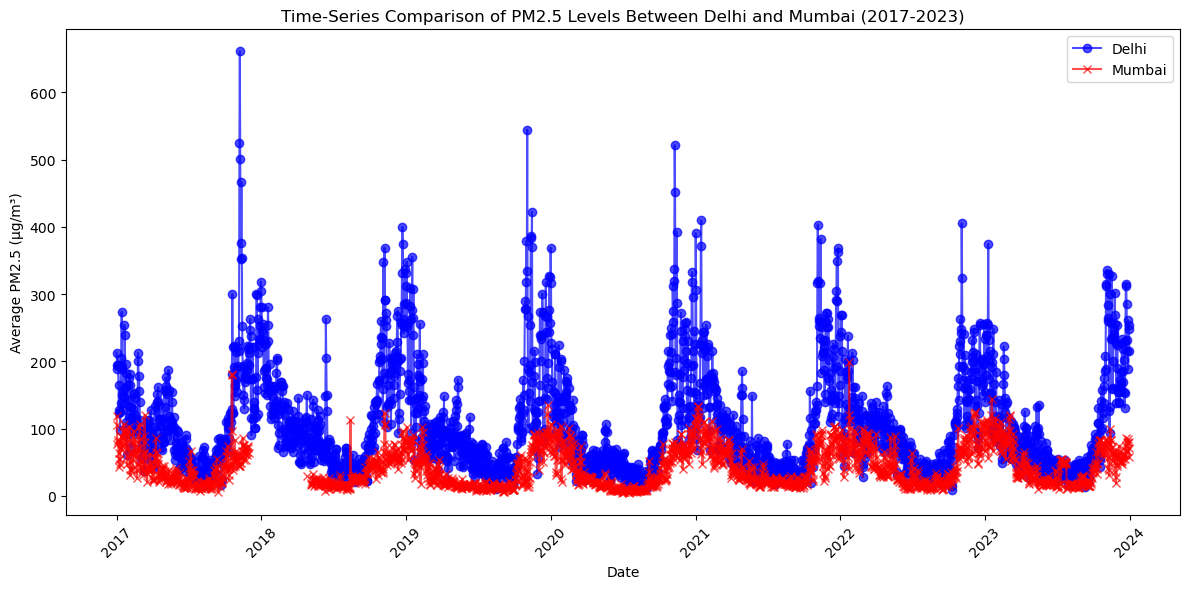

Delhi's fluctuation (standard deviation): 77.73285570085264
Mumbai's fluctuation (standard deviation): 28.418444008252862
Delhi had more fluctuations in PM2.5 levels.


In [81]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filter data for Delhi and Mumbai, and for the years 2017-2023
df_delhi_mumbai = df[df['city'].isin(['Delhi', 'Mumbai'])]
df_delhi_mumbai = df_delhi_mumbai[df_delhi_mumbai['Timestamp'].dt.year.between(2017, 2023)]
df_delhi_mumbai['PM2.5'] = pd.to_numeric(df_delhi_mumbai['PM2.5'], errors='coerce')

# Group the data by city and date, calculating the daily average PM2.5
df_delhi_mumbai['Date'] = df_delhi_mumbai['Timestamp'].dt.date
daily_avg_pm25 = df_delhi_mumbai.groupby(['city', 'Date'])['PM2.5'].mean().unstack(level=0)

# Plot the time-series graph for Delhi and Mumbai
plt.figure(figsize=(12, 6))
daily_avg_pm25['Delhi'].plot(label='Delhi', linestyle='-', marker='o', color='blue', alpha=0.7)
daily_avg_pm25['Mumbai'].plot(label='Mumbai', linestyle='-', marker='x', color='red', alpha=0.7)

plt.title('Time-Series Comparison of PM2.5 Levels Between Delhi and Mumbai (2017-2023)')
plt.xlabel('Date')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the standard deviation to compare fluctuations (We have defined fluctuations as standard deviation as it better represents the data)
delhi_fluctuation = daily_avg_pm25['Delhi'].std()
mumbai_fluctuation = daily_avg_pm25['Mumbai'].std()

print(f"Delhi's fluctuation (standard deviation): {delhi_fluctuation}")
print(f"Mumbai's fluctuation (standard deviation): {mumbai_fluctuation}")

# Determine which city had more fluctuations
if delhi_fluctuation > mumbai_fluctuation:
    print("Delhi had more fluctuations in PM2.5 levels.")
else:
    print("Mumbai had more fluctuations in PM2.5 levels.")

# Note: there are some NaN values for Mumbai in the year 2018-2019

## Population based

**Q1**

In [5]:
import pandas as pd

dataset_file = "Data.csv"  
population_file = "State_data.csv"  


stations_df = pd.read_csv(dataset_file)  # Dataset containing states and  respective monitoring stations
population_df = pd.read_csv(population_file)  # Dataset containing states and population


population_df.columns = population_df.columns.str.lower()
# This we did so that both the datasets can have "state" as a common merging column!


# Counting the number of unique monitoring stations per state
stations_per_state = stations_df.groupby("state")["station"].nunique().reset_index()
stations_per_state.rename(columns={"station": "num_stations"}, inplace=True)


# Now we shall merge it with population data
merged_df = stations_per_state.merge(population_df, on="state", how="left")


# Since we are required to relatively compare the number of monitoring stations concerning population we take 1 million as the base standard! 
merged_df["stations_per_million"] = merged_df["num_stations"] / (merged_df["population"] / 1_000_000)


# Find the state with the highest ratio
highest_ratio_state = merged_df.loc[merged_df["stations_per_million"].idxmax()]


print(f"The state with the highest number of monitoring stations per million people is {highest_ratio_state['state']} "
      f"with {highest_ratio_state['stations_per_million']:.2f} stations per million people.")

The state with the highest number of monitoring stations per million people is Chandigarh with 2.84 stations per million people.


**Q2**

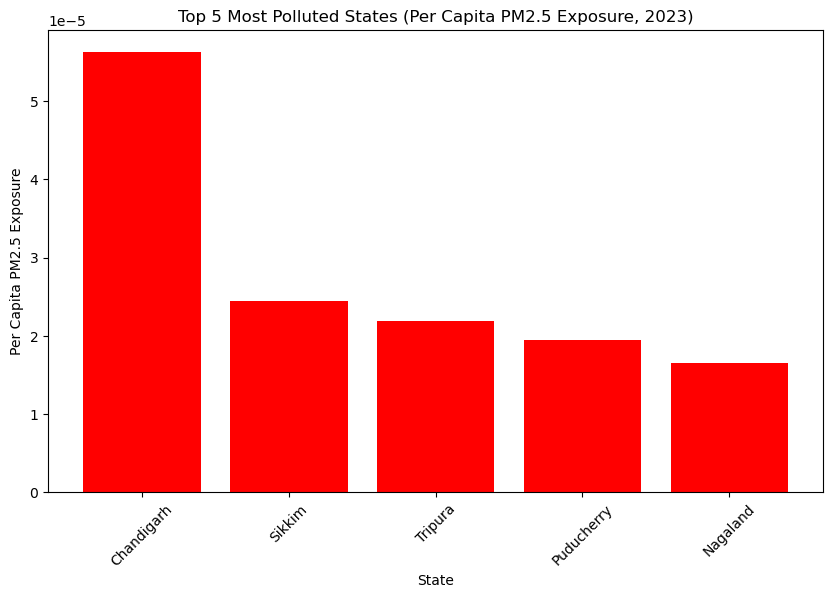

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


state_data = pd.read_csv("State_data.csv") 
data = pd.read_csv("Data.csv") 


# Extract year from 'Timestamp' column (given format is 'yyyy-mm-dd')
data["year"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d").dt.year


# Filtering the data for 2023
data_2023 = data[data["year"] == 2023]


# Aggregate PM2.5 levels by state for the year 2023
pm2_5_by_state = data_2023.groupby("state")["PM2.5"].mean().reset_index()
pm2_5_by_state.rename(columns={"PM2.5": "avg_pm2_5"}, inplace=True)


# Merging it with state population data
merged_df = pm2_5_by_state.merge(state_data, left_on="state", right_on="State", how="left")


# Compute per capita PM2.5 exposure
merged_df["per_capita_pm2_5"] = merged_df["avg_pm2_5"] / merged_df["Population"]


# Get the top 5 most polluted states
top_5_polluted = merged_df.nlargest(5, "per_capita_pm2_5")


plt.figure(figsize=(10, 6))
plt.bar(top_5_polluted["state"], top_5_polluted["per_capita_pm2_5"], color="red")
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States (Per Capita PM2.5 Exposure, 2023)")
plt.xticks(rotation=45)
plt.show()


**Q3**

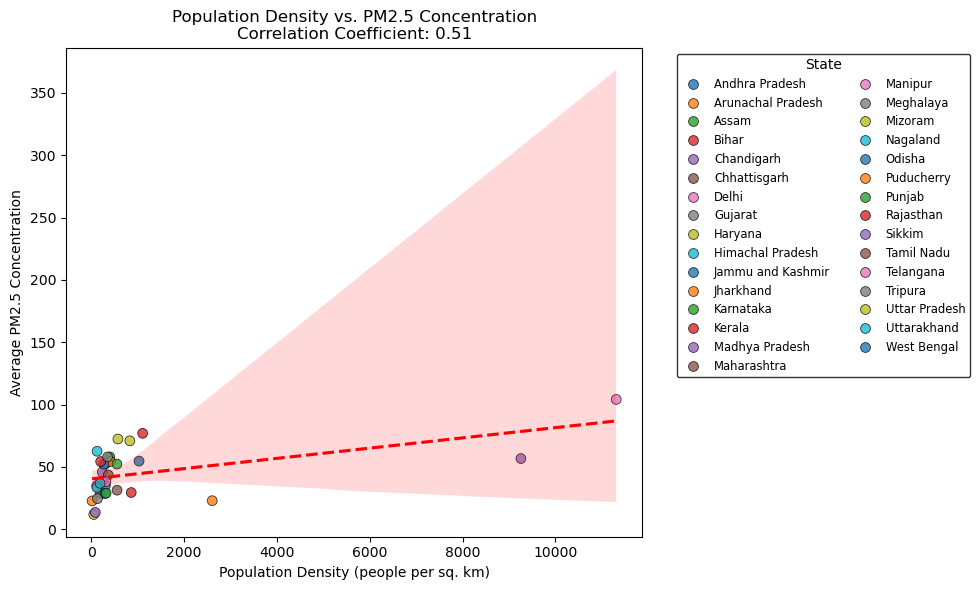

Pearson Correlation Coefficient: 0.51 (p-value: 0.0033)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


pollution_df = pd.read_csv("Data.csv")  # Contains PM2.5 data per state
population_df = pd.read_csv("State_data.csv")  # Contains population density data


# Drop rows with missing PM2.5 values
pollution_df = pollution_df.dropna(subset=["PM2.5"])


# We create the column for population density in the population dataset!
population_df["population_density"] = population_df["Population"]/ population_df["Area (km2)"]


population_df.columns = population_df.columns.str.lower()
# This we did so that both the datasets can have "state" as a common merging column!


# Computing average PM2.5 concentration per state
pm25_per_state = pollution_df.groupby("state")["PM2.5"].mean().reset_index()


# Merging the above data with population density data
merged_df = pm25_per_state.merge(population_df, on="state", how="left")


# Dropping rows with missing values even after merging
merged_df = merged_df.dropna()


# Extract values for correlation calculation
x = merged_df["population_density"]
y = merged_df["PM2.5"]


# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(x, y)


# Create a scatter plot with improvements
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=merged_df, 
    x="population_density", 
    y="PM2.5", 
    hue="state", 
    palette="tab10",  # More distinct colors
    s=50,  # Larger markers
    alpha=0.8,  # Slight transparency
    edgecolor="black")


# Adding a regression trendline
sns.regplot(data=merged_df, x="population_density", y="PM2.5", scatter=False, color="red", line_kws={"linestyle":"dashed"})


# Adjust legend so that it doesn't coincide with the main plot and gives the required clarity too!
legend = plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2, fontsize="small", frameon=True)
legend.get_frame().set_edgecolor("black")  # Add a border
plt.xlabel("Population Density (people per sq. km)")
plt.ylabel("Average PM2.5 Concentration")
plt.title(f"Population Density vs. PM2.5 Concentration\nCorrelation Coefficient: {correlation:.2f}")
plt.tight_layout()  # Adjusting the layout to fit legend
plt.show()


# Print correlation result
print(f"Pearson Correlation Coefficient: {correlation:.2f} (p-value: {p_value:.4f})")

In [23]:
# As we can see here that with increasing population density the Average PM2.5 value also increases which is the general trend but 
# for smaller values of population density we can see that even places with lesser population density have higher average PM 2.5 concentration!!

## Area based 

**Q1**

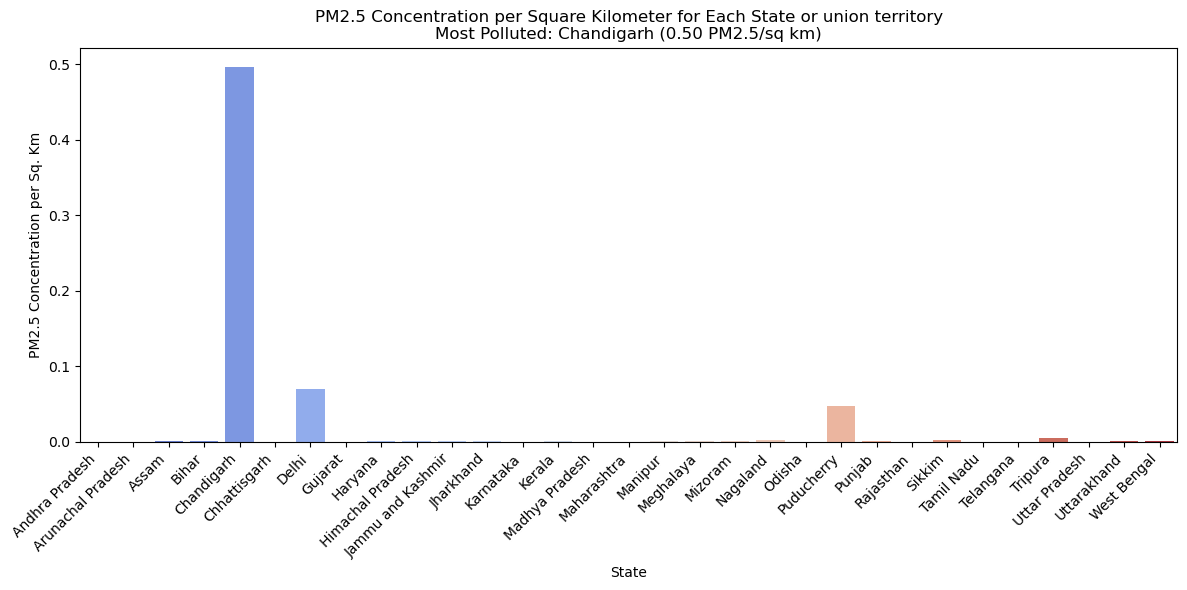

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
pollution_file = "Data.csv"  
area_file = "State_data.csv"  

pollution_df = pd.read_csv(pollution_file)  # Contains PM2.5 data per state
area_df = pd.read_csv(area_file)  # Contains area (sq km) per state

area_df.columns = area_df.columns.str.lower()
# This we did so that both the datasets can have "state" as a common merging column!

# Drop the missing values
pollution_df = pollution_df.dropna(subset=["PM2.5"])

# Compute average PM2.5 concentration per state
pm25_per_state = pollution_df.groupby("state")["PM2.5"].mean().reset_index()

# Merge with area data
merged_df = pm25_per_state.merge(area_df, on="state", how="left").dropna()

# Calculate PM2.5 concentration per square km area of the states
merged_df["PM2.5_per_sq_km"] = merged_df["PM2.5"] / merged_df["area (km2)"]

# Find state with highest PM2.5 per sq. km
most_polluted_state = merged_df.loc[merged_df["PM2.5_per_sq_km"].idxmax()]

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x="state", y="PM2.5_per_sq_km", hue="state", palette="coolwarm", legend=False)
plt.xlabel("State")
plt.ylabel("PM2.5 Concentration per Sq. Km")
plt.title(f"PM2.5 Concentration per Square Kilometer for Each State or union territory\nMost Polluted: {most_polluted_state['state']} ({most_polluted_state['PM2.5_per_sq_km']:.2f} PM2.5/sq km)")
plt.xticks(rotation=45, ha="right")  
# Rotated x-axis labels to enhance readability!

plt.tight_layout()
plt.show()

# Note: Delhi is a city or a union territory. Chandhigarh is also a union territory

**Q2**

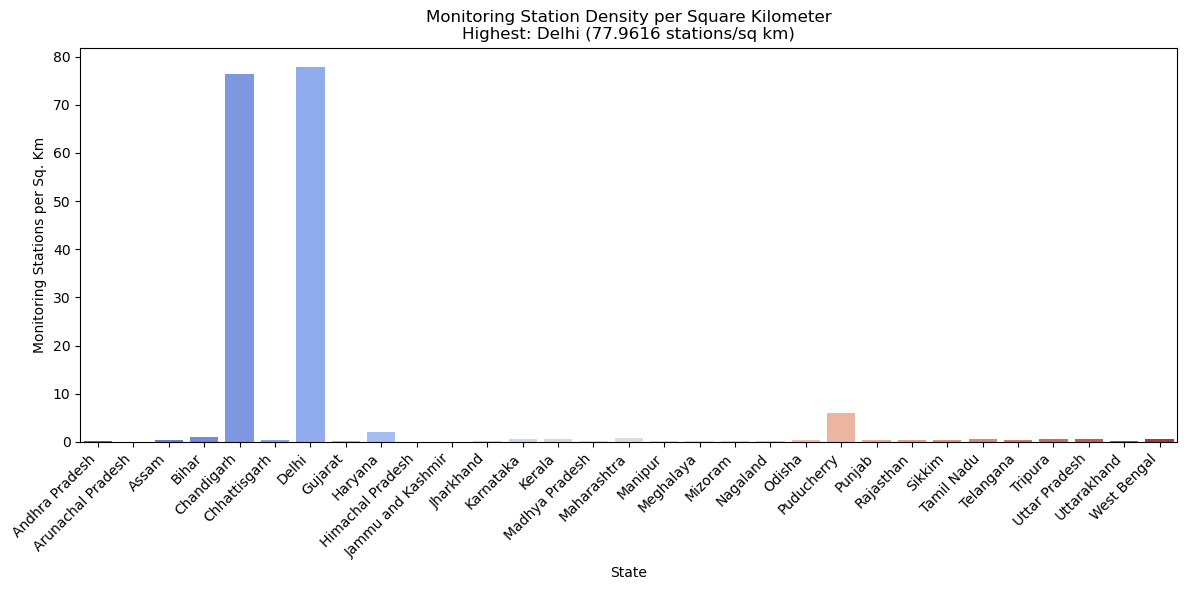

The state with the highest monitoring station density is Delhi with 77.9616 stations per square km.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
stations_file = "Data.csv"  
area_file = "State_data.csv"

stations_df = pd.read_csv(stations_file)  # Contains monitoring station counts per state
area_df = pd.read_csv(area_file)  # Contains state area (sq km)

area_df.columns = area_df.columns.str.lower()
# This we did so that both the datasets can have "state" as a common merging column!


# Compute the total number of stations per state and merge the result with area date!
stations_per_state = stations_df.groupby("state").size().reset_index(name="station")
merged_df = stations_per_state.merge(area_df, on="state", how="left").dropna()

# Calculating the number of monitoring stations per square km
merged_df["stations_per_sq_km"] = merged_df["station"] / merged_df["area (km2)"]

# Finding the state with highest station density
highest_density_state = merged_df.loc[merged_df["stations_per_sq_km"].idxmax()]

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x="state", y="stations_per_sq_km", hue="state", palette="coolwarm", legend=False)
plt.xlabel("State")
plt.ylabel("Monitoring Stations per Sq. Km")
plt.title(f"Monitoring Station Density per Square Kilometer\nHighest: {highest_density_state['state']} ({highest_density_state['stations_per_sq_km']:.4f} stations/sq km)")
plt.xticks(rotation=45, ha="right")  
# Rotate labels for better readability

plt.tight_layout()
plt.show()

# Print the state with highest station density 
print(f"The state with the highest monitoring station density is {highest_density_state['state']} with {highest_density_state['stations_per_sq_km']:.4f} stations per square km.")


**Q3**

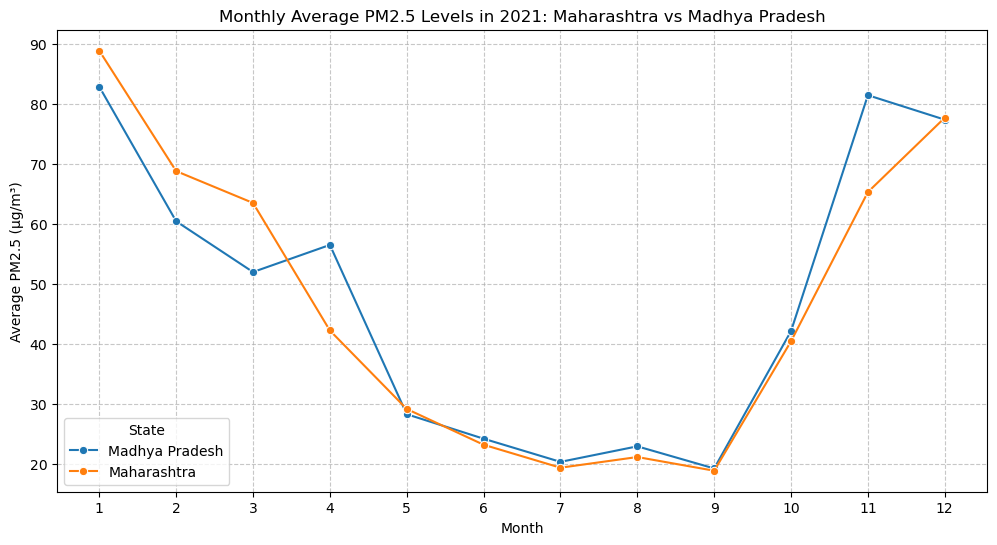

Analysis of PM2.5 Levels and Population Density:
Madhya Pradesh:
  Average PM2.5: 47.28 µg/m³
  Population Density: 235.61 people/km²
Maharashtra:
  Average PM2.5: 46.51 µg/m³
  Population Density: 365.19 people/km²

Correlation between PM2.5 and Population Density: -0.02


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pm25_df = pd.read_csv("Data.csv")
pop_area_df = pd.read_csv("State_data.csv")

# Standardizing column names
pm25_df.columns = pm25_df.columns.str.strip().str.lower()
pop_area_df.columns = pop_area_df.columns.str.strip().str.lower()

pm25_df["year"] = pd.to_datetime(pm25_df["timestamp"], format="%Y-%m-%d").dt.year
pm25_df["month"] = pd.to_datetime(pm25_df["timestamp"], format="%Y-%m-%d").dt.month

# Filter data for 2021 and for Maharashtra and Madhya Pradesh
filtered_df = pm25_df[(pm25_df["year"] == 2021) & 
                      (pm25_df["state"].isin(["Maharashtra", "Madhya Pradesh"]))]

# Calculating monthly average PM2.5 for each state
monthly_avg_pm25 = filtered_df.groupby(["state", "month"])["pm2.5"].mean().reset_index()

# Merging with population data
merged_df = monthly_avg_pm25.merge(pop_area_df, on="state", how="left")

merged_df["population_density"] = merged_df["population"] / merged_df["area (km2)"]

# Plot comparison of PM2.5 levels over months
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x="month", y="pm2.5", hue="state", marker="o")
plt.xlabel("Month")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Monthly Average PM2.5 Levels in 2021: Maharashtra vs Madhya Pradesh")
plt.legend(title="State")
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate overall average PM2.5 for each state
state_avg_pm25 = merged_df.groupby("state").agg({
    "pm2.5": "mean",
    "population_density": "first"
}).reset_index()

# Print analysis results
print("Analysis of PM2.5 Levels and Population Density:")
for index, row in state_avg_pm25.iterrows():
    print(f"{row['state']}:")
    print(f"  Average PM2.5: {row['pm2.5']:.2f} µg/m³")
    print(f"  Population Density: {row['population_density']:.2f} people/km²")

# Calculate correlation between PM2.5 and population density
correlation = merged_df["pm2.5"].corr(merged_df["population_density"])
print(f"\nCorrelation between PM2.5 and Population Density: {correlation:.2f}")


In [25]:
# Upon analyzing this data we can say that:
# Population density is not the only deterministic factor when finding the average PM2.5 levels at any place. 
# It depends on other factors like the presence of factories and weather conditions. Also, a big role is played by the policy makers too!
# Thus despite the high population density of Maharashtra, Madhya Pradesh has higher average PM 2.5 levels!!

## Funding Based

**Q1**

In [27]:
import pandas as pd


state_data = pd.read_csv("State_data.csv") 
data = pd.read_csv("Data.csv")  
ncap_funding = pd.read_csv("NCAP_Funding.csv") 


# Extract year from 'Timestamp' and filter for the year 2021
data["year"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d").dt.year
data_2021 = data[data["year"] == 2021]


# Calculate average PM2.5 for each state in 2021
pm2_5_by_state = data_2021.groupby("state")["PM2.5"].mean().reset_index()
pm2_5_by_state.rename(columns={"PM2.5": "avg_pm2_5"}, inplace=True)


# Mark states that received NCAP funding and merge PM2.5 data with NCAP funding data
ncap_funding["received_funding"] = True  


merged_df = pm2_5_by_state.merge(ncap_funding, left_on="state", right_on="State", how="left")
merged_df["received_funding"] = merged_df["received_funding"].astype("boolean").fillna(False)


# Compute average PM2.5 for funded and non-funded states
avg_pm2_5_funded = merged_df[merged_df["received_funding"] == True]["avg_pm2_5"].mean();
avg_pm2_5_non_funded = merged_df[merged_df["received_funding"] == False]["avg_pm2_5"].mean()


print(f"Average PM2.5 Levels in 2021:")
print(f"States with NCAP Funding: {avg_pm2_5_funded:.2f} µg/m³")
print(f"States without NCAP Funding: {avg_pm2_5_non_funded:.2f} µg/m³")

Average PM2.5 Levels in 2021:
States with NCAP Funding: 51.28 µg/m³
States without NCAP Funding: 32.95 µg/m³


**Q2**

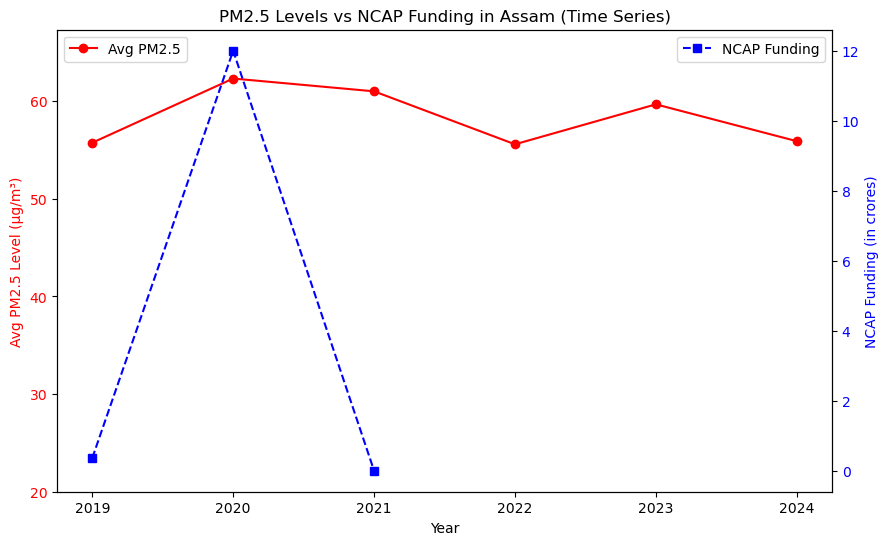

In [67]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("Data.csv")  
funding = pd.read_csv("NCAP_Funding.csv")


# Extract year
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")
data["year"] = data["Timestamp"].dt.year


# Filter data for Assam only and compute yearly average PM2.5 levels for Assam
assam_data = data[data["state"] == "Assam"]
assam_pm2_5 = assam_data.groupby("year")["PM2.5"].mean().reset_index()


# Filter funding data for Assam
assam_funding = funding[funding["State"] == "Assam"]


# Reshape(melt) the funding data to create a 'Year' column which shall be used for merging later on!
funding_columns = [
    "Amount released during FY 2019-20",
    "Amount released during FY 2020-21",
    "Amount released during FY 2021-22",
]
year_mapping = {"Amount released during FY 2019-20": 2019, "Amount released during FY 2020-21": 2020, "Amount released during FY 2021-22": 2021}


assam_funding = assam_funding.melt(
    id_vars=["State"],
    value_vars=funding_columns,
    var_name="Funding Year",
    value_name="Funding"
)


# Convert funding year column to actual year values
assam_funding["year"] = assam_funding["Funding Year"].map(year_mapping)

# Drop unnecessary columns
assam_funding.drop(columns=["Funding Year", "State"], inplace=True)


# Convert the non-numeric funding values ("-") to NaN first and then replace all with 0
assam_funding["Funding"] = pd.to_numeric(assam_funding["Funding"], errors="coerce").fillna(0)


# Group funding data by year to sum all funding per year
assam_funding = assam_funding.groupby("year", as_index=False)["Funding"].sum()


# Now merge with PM2.5 data
merged_assam = assam_pm2_5.merge(assam_funding, on="year", how="left")


# Plot the time series chart
fig, ax1 = plt.subplots(figsize=(10, 6))


# PM2.5 levels (Left Y-axis)
ax1.plot(merged_assam["year"], merged_assam["PM2.5"], color="red", marker="o", linestyle="-", label="Avg PM2.5")
ax1.set_xlabel("Year")
ax1.set_ylabel("Avg PM2.5 Level (µg/m³)", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_ylim(20, merged_assam["PM2.5"].max() + 5)  
# Started from 20 to analyze the trend in the best possible way!


# NCAP Funding (Right Y-axis)
ax2 = ax1.twinx()
ax2.plot(merged_assam["year"], merged_assam["Funding"], color="blue", marker="s", linestyle="--", label="NCAP Funding")
ax2.set_ylabel("NCAP Funding (in crores)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")


plt.title("PM2.5 Levels vs NCAP Funding in Assam (Time Series)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


In [71]:
# Here we can see even after funding increased from 2019 to 2020 the average PM2.5 level increased on the other hand as the funding decreased from
# 2020 to 2021 the avg PM2.5 value decreased. So we can see that increased funding does not necessarily lead to improved air quality.
# The decreased value in 2020-21 was also due to COVID-19 and may not be as a reason of increased funding.

**Q3**

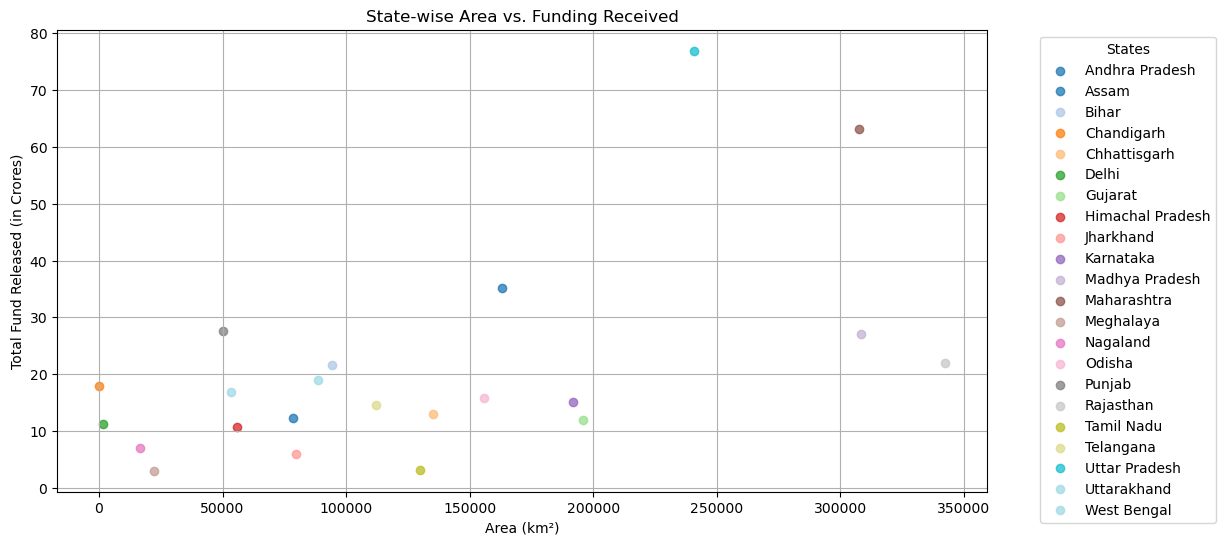

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

funding_df = pd.read_csv("NCAP_Funding.csv")
state_df = pd.read_csv("State_data.csv")

# Aggregate total funding per state
funding_agg = funding_df.groupby("State")["Total fund released"].sum().reset_index()

# Merging datasets on the 'State' column
merged_df = funding_agg.merge(state_df, on="State", how="inner")

# Assigning a unique color to each state(For clarity)
unique_states = merged_df["State"].unique()
colors = plt.get_cmap("tab20", len(unique_states))

# Create scatter plot
plt.figure(figsize=(12, 6))
for i, state in enumerate(unique_states):
    state_data = merged_df[merged_df["State"] == state]
    plt.scatter(state_data["Area (km2)"], state_data["Total fund released"], 
                color=colors(i), label=state, alpha=0.75)

# Add labels and title
plt.xlabel("Area (km²)")
plt.ylabel("Total Fund Released (in Crores)")
plt.title("State-wise Area vs. Funding Received")
plt.grid(True)

# Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="States")
plt.show()


## Miscellaneous Questions

**Q1**

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv")

# Filter for the year 2023
df_1 = df[df["Timestamp"].str.contains("2023", na=False)].copy()
df_1["Timestamp"] = pd.to_datetime(df_1["Timestamp"], errors="coerce")

# Find most polluted city
df_2 = df_1.groupby("city", observed=True)["PM2.5"].mean()
city = df_2.idxmax()
df_3 = df_1[df_1["city"] == city].copy()

df_3["Weekday"] = df_3["Timestamp"].dt.weekday

# Find hazardous days(use nunique())
total_days = df_3["PM2.5"].nunique()
df_4 = df_3[df_3["PM2.5"] >= 300]
hazard_days = df_4["PM2.5"].nunique()

percentage = (hazard_days / total_days) * 100

# Print results
print("Most polluted city in 2023:", city)
print("Total days:", total_days)
print("Hazardous days:", hazard_days)
print(f"The percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³): {percentage:.2f}")


Most polluted city in 2023: Darbhanga
Total days: 13
Hazardous days: 3
The percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³): 23.08


**Q2**

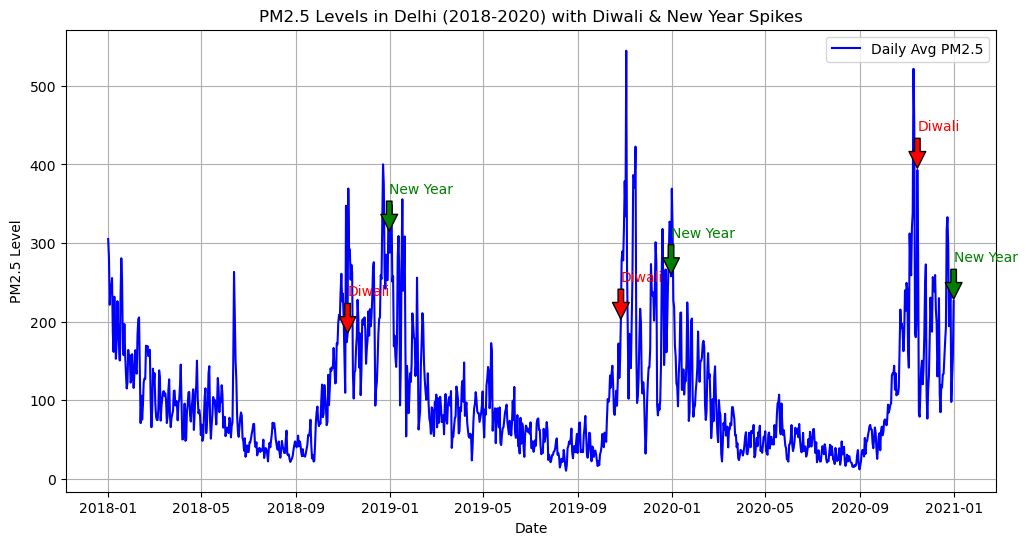

In [79]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

df = pd.read_csv("Data.csv")

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Filter for Delhi data
df_delhi = df[df["city"] == "Delhi"].copy()

# Extract relevant years (2018-2020)
df_delhi = df_delhi[(df_delhi["Timestamp"].dt.year >= 2018) & (df_delhi["Timestamp"].dt.year <= 2020)]

# Keep only necessary columns
df_delhi = df_delhi[["Timestamp", "PM2.5"]].dropna()

# Extract month and year for analysis
df_delhi["Year"] = df_delhi["Timestamp"].dt.year
df_delhi["Month"] = df_delhi["Timestamp"].dt.month
df_delhi["Date"]=df_delhi["Timestamp"].dt.date

# Group by day to get average PM2.5 levels
df_daily = df_delhi.groupby(df_delhi["Date"]).mean().reset_index()

# Plot PM2.5 levels over time
plt.figure(figsize=(12, 6))
plt.plot(df_daily["Timestamp"], df_daily["PM2.5"], label="Daily Avg PM2.5", color="blue")

# Identify Diwali and New Year periods
diwali_dates = {
    2018: "2018-11-07",
    2019: "2019-10-27",
    2020: "2020-11-14",
}
new_year_dates = ["2018-12-31", "2019-12-31", "2020-12-31"]

# Convert to datetime
diwali_dates = {year: pd.to_datetime(date) for year, date in diwali_dates.items()}
new_year_dates = [pd.to_datetime(date) for date in new_year_dates]

# Mark Diwali and New Year spikes with arrows
for year, date in diwali_dates.items():
    spike_value = df_daily[df_daily["Timestamp"] == date]["PM2.5"].values
    if spike_value:
        plt.annotate("Diwali", xy=(date, spike_value[0]), xytext=(date, spike_value[0] + 50),
                     arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color="red")

for date in new_year_dates:
    spike_value = df_daily[df_daily["Timestamp"] == date]["PM2.5"].values
    if spike_value:
        plt.annotate("New Year", xy=(date, spike_value[0]), xytext=(date, spike_value[0] + 50),
                     arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, color="green")

# Labels and title
plt.xlabel("Date")
plt.ylabel("PM2.5 Level")
plt.title("PM2.5 Levels in Delhi (2018-2020) with Diwali & New Year Spikes")
plt.legend()
plt.grid(True)


plt.show()


In [7]:
# With more people travelling and burning of firecrackers in diwali and new year, the pollution level increases as can be seen from the spikes.
# In subsequent months, the pollution level decreases with monsoon.

**Q3**

Highest Funded State: Andhra Pradesh


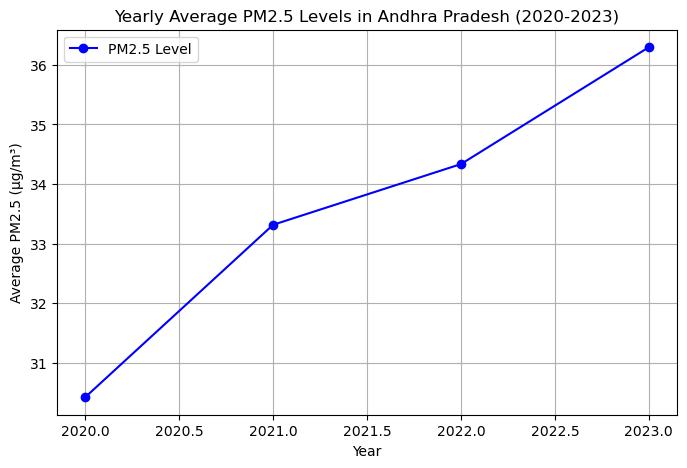

Year
2020    30.425130
2021    33.316491
2022    34.334527
2023    36.294259
Name: PM2.5, dtype: float64


In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load NCAP funding data
ncap_funding_df = pd.read_csv("NCAP_Funding.csv")

# Convert "Amount released during FY 2020-21" to numeric, replacing '-' with 0
ncap_funding_df["Amount released during FY 2020-21"] = pd.to_numeric(
    ncap_funding_df["Amount released during FY 2020-21"].replace("-", 0), errors="coerce"
)

# Aggregate total funding for 2020-21 by state
state_funding_2020 = ncap_funding_df.groupby("State", observed=True)["Amount released during FY 2020-21"].sum()

# Identify the state with the highest funding
highest_funded_state = state_funding_2020.idxmax()

# Load air pollution data
air_pollution_df = pd.read_csv("Data.csv")

# Convert timestamp to datetime format
air_pollution_df["Timestamp"] = pd.to_datetime(air_pollution_df["Timestamp"], errors="coerce")

# Filter data for the highest-funded state
state_pollution_df = air_pollution_df[air_pollution_df["state"] == highest_funded_state].copy()
print("Highest Funded State:", highest_funded_state)

# Extract year and compute yearly average PM2.5 levels
state_pollution_df.loc[:, "Year"] = state_pollution_df["Timestamp"].dt.year
yearly_pm25 = state_pollution_df.groupby("Year", observed=True)["PM2.5"].mean()

# Filter for years 2020-2023
yearly_pm25 = yearly_pm25.loc[2020:2023]

# Plot the PM2.5 trend
plt.figure(figsize=(8, 5))
plt.plot(yearly_pm25.index, yearly_pm25.values, marker="o", linestyle="-", color="b", label="PM2.5 Level")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"Yearly Average PM2.5 Levels in {highest_funded_state} (2020-2023)")
plt.grid(True)
plt.legend()
plt.show()

# Print computed yearly PM2.5 values
print(yearly_pm25)

In [ ]:
# Instead of improvement, we observe a steady increase in average PM2.5 levels. This could mean that the funds are not being utilized properly to accomodate this.

**Q4**

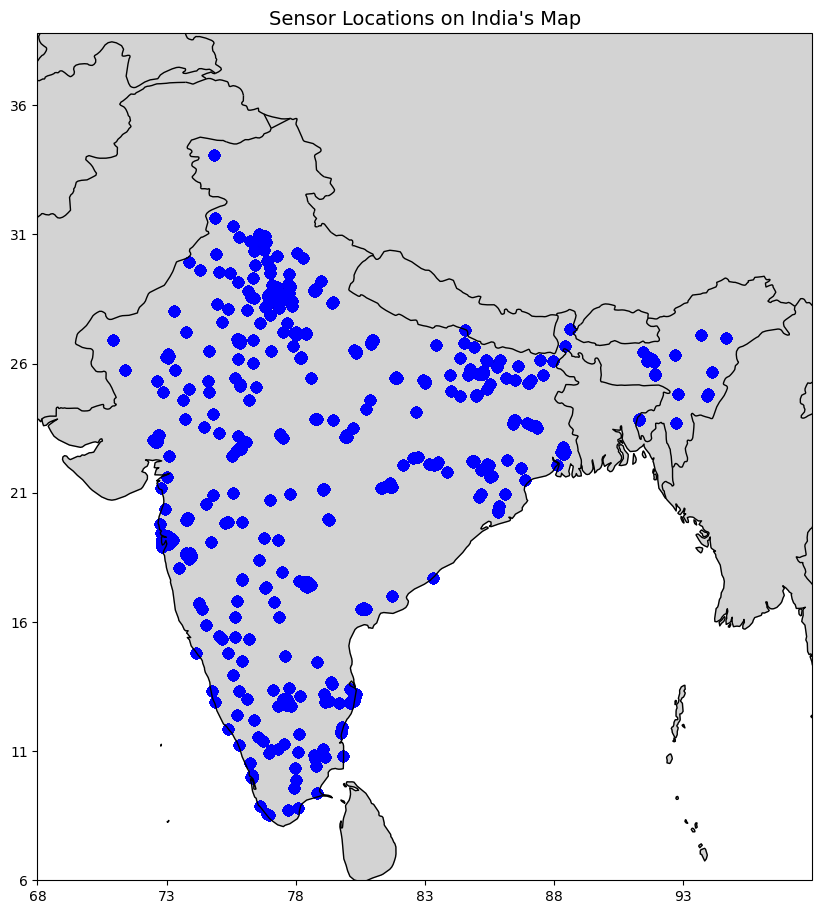

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load sensor data
df = pd.read_csv("Data.csv")  # Ensure 'latitude' and 'longitude' columns exist

# Drop missing values
df = df.dropna(subset=['latitude', 'longitude'])

# Create a map using Cartopy
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.set_extent([68, 98, 6, 38])  # India's bounding box (long_min, long_max, lat_min, lat_max)
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.LAND, color='lightgray')

# Plot sensor locations
ax.scatter(df["longitude"], df["latitude"], color='blue', marker="o", s=50)

# Add title and legend
plt.title("Sensor Locations on India's Map", fontsize=14)
plt.xticks(np.arange(68,98,5))
plt.yticks(np.arange(6,38,5))
plt.show()


## Tell us Something New


#### One interesting observation from the dataset that hasn't been directly asked but could be valuable for policymakers relates to the relationship between the density of air quality monitoring stations and pollution levels across different states. While we know that states with more monitoring stations tend to have more data on air pollution, it would be insightful to explore whether the distribution of monitoring stations is concentrated in more polluted areas or if there are regions with high pollution but few monitoring stations.

#### If certain areas with high PM2.5 levels are poorly monitored, it could skew the accuracy of pollution trends and hinder effective policy implementation. It might be beneficial for policymakers to allocate monitoring resources based on areas where pollution levels are persistently high but are underrepresented in the dataset.

#### Possible insight for policymakers: If high-pollution areas are under-monitored, it might be critical to establish more monitoring stations in these regions to get a clearer picture of pollution trends and take action accordingly.